# 4 EDA

5/4/22



- [setup](#setup)
    - [Import libraries](#Import-libraries)
    - [import data](#import-data)

## setup

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import json

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

merged_data_path = '../merged_data/'


### import data

In [4]:
os.listdir(merged_data_path)

['merged_tweets.csv',
 'merged_users.csv',
 'wordle_games.csv',
 'wordle_games.pkl']

In [5]:
#low_memory = False is to deal with mixed column types. check these
tweets = pd.read_csv(merged_data_path + 'merged_tweets.csv', low_memory = False)
users = pd.read_csv(merged_data_path + 'merged_users.csv', low_memory = False)

In [6]:
tweets.set_index('id', inplace = True)
tweets.head(3)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733011414257664,1521733011414257664,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,NaN,NaN,NaN,NaN,NaN


In [7]:
users.set_index('id', inplace = True)
users.head(3)

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1.006111e+18,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",NaN,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,NaN,NaN,NaN
3.600020e+08,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,NaN,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
8.288181e+17,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,NaN,NaN,NaN


In [8]:
#I want to left-merge onto tweets. Each tweet has user info tacked on. some users will be repeated.
len(tweets), len(users)

(243245, 168362)

In [9]:
#the merged df should have as many records as tweets.

#tweets-users dataframe
tweets['id_tweets_copy'] = tweets.index
tudf = pd.merge(tweets, users, how = 'left', left_on = 'author_id', right_on = 'id', suffixes = ('_tweet', '_user') )
tudf.fillna(0, inplace = True)
tudf.drop_duplicates(subset = 'id_tweets_copy', inplace = True)
tudf.set_index('id_tweets_copy', inplace=True)
tudf.index.rename('tweet_id', inplace = True)
tudf


,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,...,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,...,0,0,0,0,0,0,0,0,0.0,0
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,...,https://t.co/uMfikCmd0I,0,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1521733011414257664,1521733011414257664,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,...,0,0,0,0,0,0,0,0,0.0,0
1521733010504445954,1521733010504445954,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\n\nWordle 319 3/6\n\n⬜🟩⬜🟨⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,...,https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,...,0,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520733413246144512,1520733413246144512,everyone,es,"{'urls': [{'start': 118, 'end': 141, 'url': 'h...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Una de las malditas con montones de posibilida...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2568024265,...,0,0,0,0,0,0,0,0,0.0,0
1520733412725870592,1520733412725870592,everyone,und,"{'hashtags': [{'start': 0, 'end': 7, 'tag': 'W...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#Wordle 316 4/6\r\n\r\n🟨⬛⬛⬛⬛\r\n⬛⬛🟨⬛🟨\r\n⬛⬛⬛⬛🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",91813530,...,https://t.co/s46eDxHM7n,0,https://pbs.twimg.com/profile_images/145343436...,Malta,False,kabo59,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733410947485702,1520733410947485702,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 6/6\r\n\r\n🟨🟩⬛⬛⬛\r\n⬛🟩⬛⬛⬛\r\n⬛🟩⬛⬛⬛c...,"[{'domain': {'id': '30', 'name': 'Entities [En...",19242429,...,https://t.co/p52lELGgR6,Toronto's Favorite Hot Shot / Bon Vivant / Pos...,https://pbs.twimg.com/profile_images/450450271...,Toronto,False,Jeremy__Kay,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0


In [10]:
tudf.iloc[0]['text']

'Wordle (ES)  #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n https://t.co/oJCukg4JnD'

In [11]:
print('\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n')


⬜⬜🟨🟩⬜
⬜⬜🟨🟩⬜
⬜⬜⬜🟩🟩
⬜🟩⬜🟩🟩
🟩🟩🟩🟩🟩



In [12]:
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192115 entries, 1521733018293084160 to 1520733408237916161
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       192115 non-null  int64  
 1   reply_settings        192115 non-null  object 
 2   lang                  192115 non-null  object 
 3   entities_tweet        192115 non-null  object 
 4   possibly_sensitive    192115 non-null  bool   
 5   source                192115 non-null  object 
 6   public_metrics_tweet  192115 non-null  object 
 7   text                  192115 non-null  object 
 8   context_annotations   192115 non-null  object 
 9   author_id             192115 non-null  int64  
 10  created_at            192115 non-null  object 
 11  referenced_tweets     192115 non-null  object 
 12  in_reply_to_user_id   192115 non-null  float64
 13  attachments           192115 non-null  object 
 14  geo                  

In [13]:
tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'entities_tweet',
       'possibly_sensitive', 'source', 'public_metrics_tweet', 'text',
       'context_annotations', 'author_id', 'created_at', 'referenced_tweets',
       'in_reply_to_user_id', 'attachments', 'geo', 'withheld_tweet', 'name',
       'public_metrics_user', 'url', 'description', 'profile_image_url',
       'location', 'protected', 'username', 'verified', 'entities_user',
       'pinned_tweet_id', 'withheld_user'],
      dtype='object')

In [14]:
tudf.iloc[-1]

conversation_id                                       1520733408237916161
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                          0
possibly_sensitive                                                  False
source                                                 Twitter for iPhone
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 0, 'like_c...
text                        Wordle 316 3/6\r\n\r\n⬛⬛🟩⬛⬛\r\n⬛🟩🟩⬛⬛\r\n🟩🟩🟩🟩🟩
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                             1069359838994550785
created_at                                      2022-05-01 11:54:33+00:00
referenced_tweets                                                       0
in_reply_to_user_id                                                   0.0
attachments                           

In [15]:
tudf.iloc[-2]

conversation_id                                       1482287271697170432
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                          0
possibly_sensitive                                                  False
source                                                Twitter for Android
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 1, 'like_c...
text                    Wordle (ES)  #115 4/6\r\n\r\n⬜⬜⬜⬜🟩\r\n🟨⬜⬜🟩🟩\r\...
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                                      2909723165
created_at                                      2022-05-01 11:54:33+00:00
referenced_tweets       [{'type': 'replied_to', 'id': '152030925309287...
in_reply_to_user_id                                          2909723165.0
attachments                           

In [16]:
tudf.iloc[-1]['withheld_tweet']

0

In [17]:
tudf.iloc[-2]['withheld_tweet']

0

In [18]:
tudf.iloc[-1]['withheld_tweet'] == tudf.iloc[-2]['withheld_tweet']

True

It looks like a lot of the tweets are duplicated because merges and drop_duplicates don't consider NaN == NaN. For example, `tudf.iloc[-1, 'withheld_tweet']` and `tudf.iloc[-2, 'withheld_tweet]` are both null, but they are not considered equal to each other.

In [19]:
#fast and loose fillna for dropping duplicates
tudf.fillna(0, inplace=True)

In [20]:
tudf.drop_duplicates(inplace=True)
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192115 entries, 1521733018293084160 to 1520733408237916161
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       192115 non-null  int64  
 1   reply_settings        192115 non-null  object 
 2   lang                  192115 non-null  object 
 3   entities_tweet        192115 non-null  object 
 4   possibly_sensitive    192115 non-null  bool   
 5   source                192115 non-null  object 
 6   public_metrics_tweet  192115 non-null  object 
 7   text                  192115 non-null  object 
 8   context_annotations   192115 non-null  object 
 9   author_id             192115 non-null  int64  
 10  created_at            192115 non-null  object 
 11  referenced_tweets     192115 non-null  object 
 12  in_reply_to_user_id   192115 non-null  float64
 13  attachments           192115 non-null  object 
 14  geo                  

In [21]:
tudf.tail()

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,...,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,
1520733413246144512,1520733413246144512,everyone,es,"{'urls': [{'start': 118, 'end': 141, 'url': 'h...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Una de las malditas con montones de posibilida...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2568024265,...,0,0,0,0,0,0,0,0,0.0,0
1520733412725870592,1520733412725870592,everyone,und,"{'hashtags': [{'start': 0, 'end': 7, 'tag': 'W...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#Wordle 316 4/6\r\n\r\n🟨⬛⬛⬛⬛\r\n⬛⬛🟨⬛🟨\r\n⬛⬛⬛⬛🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",91813530,...,https://t.co/s46eDxHM7n,0,https://pbs.twimg.com/profile_images/145343436...,Malta,False,kabo59,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733410947485702,1520733410947485702,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 6/6\r\n\r\n🟨🟩⬛⬛⬛\r\n⬛🟩⬛⬛⬛\r\n⬛🟩⬛⬛⬛c...,"[{'domain': {'id': '30', 'name': 'Entities [En...",19242429,...,https://t.co/p52lELGgR6,Toronto's Favorite Hot Shot / Bon Vivant / Pos...,https://pbs.twimg.com/profile_images/450450271...,Toronto,False,Jeremy__Kay,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733408607019008,1482287271697170432,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Wordle (ES) #115 4/6\r\n\r\n⬜⬜⬜⬜🟩\r\n🟨⬜⬜🟩🟩\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2909723165,...,https://t.co/p9TNxd7TyP,Diseño de videojuegos \n✨🌻🏞️😊💗☄️✨,https://pbs.twimg.com/profile_images/151907981...,Madrid,False,eliasmgo,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733408237916161,1520733408237916161,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 3/6\r\n\r\n⬛⬛🟩⬛⬛\r\n⬛🟩🟩⬛⬛\r\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1069359838994550785,...,0,0,0,0,0,0,0,0,0.0,0


---
---
## Basic EDA

---
### Language `lang`

A JSON converter for iso language codes to their proper english names was grabbed from [github/haliaeetus iso-639](https://github.com/haliaeetus/iso-639)

In [27]:
with open('../iso_639-1.json', 'r', encoding='utf-8') as lang_file:
    lang_dict = json.load(lang_file)
lang_dict['und'] = {'name':'undefined'}
lang_dict['in'] = {'name':'Indonesian'} #filling in some missing ones
lang_dict['iw'] = {'name':'Hebrew'}

In [28]:
lang_dict['aa']

{'639-1': 'aa',
 '639-2': 'aar',
 'family': 'Afro-Asiatic',
 'name': 'Afar',
 'nativeName': 'Afaraf',
 'wikiUrl': 'https://en.wikipedia.org/wiki/Afar_language'}

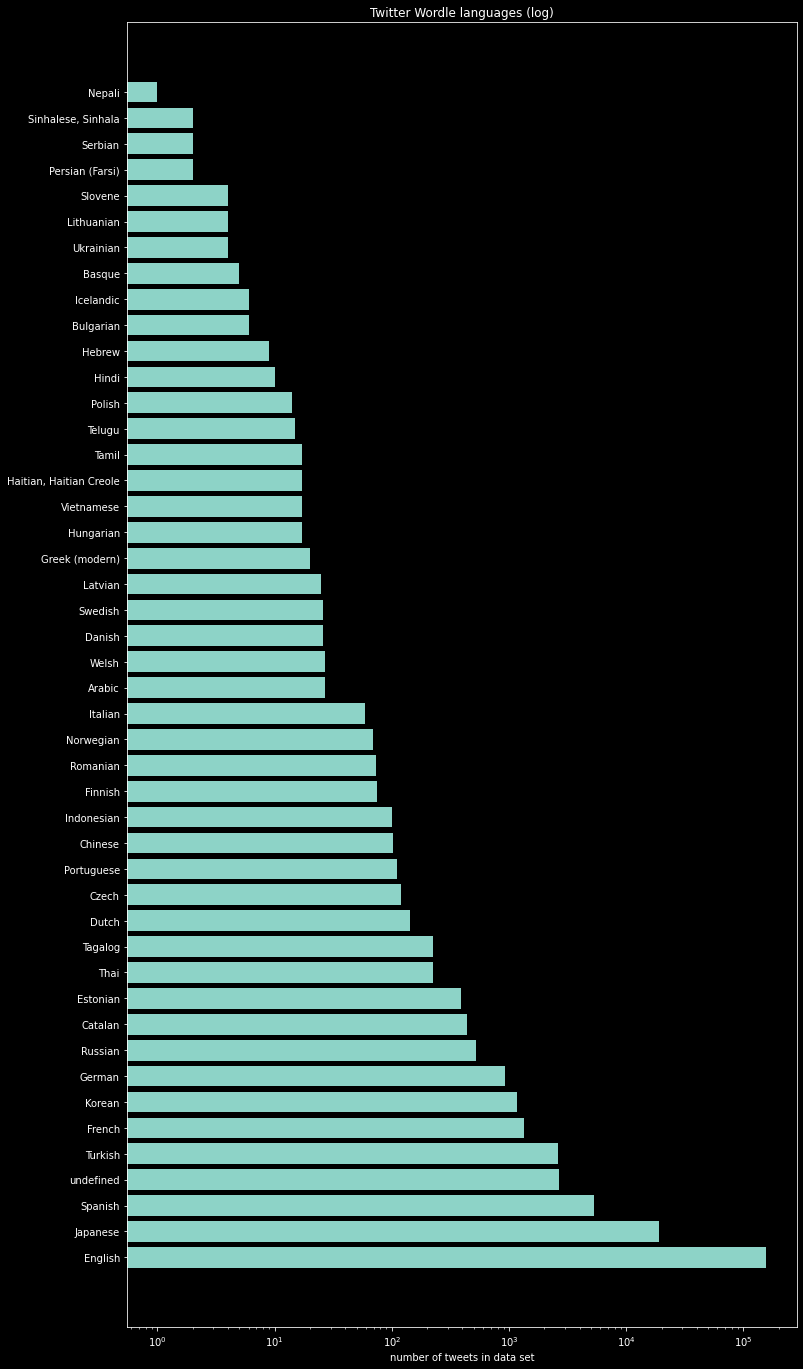

In [29]:
#plot languages
lang_vcs = tudf['lang'].value_counts()
lang_vcs_names = [
     lang_dict[lang]['name']
     for lang in lang_vcs.index
]
plt.figure(figsize=(12,24))
plt.barh(width=lang_vcs, y=lang_vcs_names, log = True)
plt.title('Twitter Wordle languages (log)')
plt.xlabel("number of tweets in data set");

### conversation Id
The `conversation_id` is the id of the "base" tweet. If it's different from the tweet id, then the tweet is a reply somewhere in a thread with the base tweet as the root.

In [30]:
# What tweets have the same conversation id as index (id)?
is_reply = tudf['conversation_id'] != tudf.index
is_reply.sum()

17635

In [31]:
is_reply.sum()/len(tudf)

0.09179397756552066

about 9% of these tweets are in reply to another tweet.

---
###  reply_settings


In [32]:
tudf['reply_settings'].value_counts()

everyone          191306
following            461
mentionedUsers       348
Name: reply_settings, dtype: int64

### entities_tweet

These were `entities` in the tweets data. Entities 

In [33]:
tudf['entities_tweet']

tweet_id
1521733018293084160    {'urls': [{'start': 54, 'end': 77, 'url': 'htt...
1521733015738662913    {'urls': [{'start': 58, 'end': 81, 'url': 'htt...
1521733011414257664                                                    0
1521733010504445954                                                    0
1521733001981444096    {'mentions': [{'start': 0, 'end': 12, 'usernam...
                                             ...                        
1520733413246144512    {'urls': [{'start': 118, 'end': 141, 'url': 'h...
1520733412725870592    {'hashtags': [{'start': 0, 'end': 7, 'tag': 'W...
1520733410947485702                                                    0
1520733408607019008                                                    0
1520733408237916161                                                    0
Name: entities_tweet, Length: 192115, dtype: object

In [34]:
#what are the unique entities?
[
    json.loads(entity.replace("'", '"'))
    for entity in tudf['entities_tweet']
    if type(entity) == str
]

JSONDecodeError: Expecting ',' delimiter: line 1 column 263 (char 262)

In [ ]:
json.loads(tudf.iloc[1]['entities_tweet'].replace("'", '"'))

In [ ]:
ok ="{'urls':[{'start': 58, 'end': 81, 'url': 'https://t.co/ifnVQsE6bO', 'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html', 'display_url': 'wordle.danielfrg.com/ciencia/index.…', 'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig', 'width': 1200, 'height': 630}, {'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=150x150', 'width': 150, 'height': 150}], 'status': 200, 'title': 'Un juego de palabras diario', 'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.', 'unwound_url': 'https://wordle.danielfrg.com/ciencia/index.html'}]}"

In [ ]:
json.loads(ok.replace("'", '"'))

# Tweet Rates, time.

In [22]:
tudf['created_at'] = pd.to_datetime(tudf['created_at'])

In [40]:
tudf.sort_values(by = 'created_at', inplace= True)

In [42]:
tudf['wordle_tweet_number'] = range(len(tudf))

In [70]:
tudf['ones'] = np.ones(len(tudf))

In [71]:
time_diff = tudf['created_at'].max() -  tudf['created_at'].min()
time_diff.seconds

21757

In [82]:
tudf['wordle_tweet_rate'] = tudf['ones'][:-1]/list(map(lambda time: time.seconds,np.diff(tudf['created_at'])))

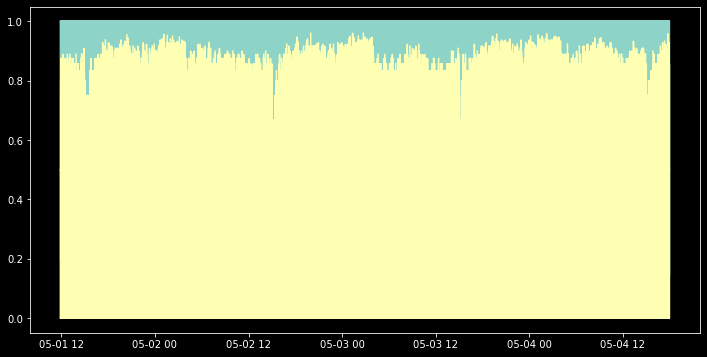

In [84]:
accumulated_tweets = np.linspace(0,len(tudf), len(tudf))
tweet_rate = [
    1/timespan.seconds
    for timespan in np.diff(tudf['created_at'].sort_values(ascending = True))
    if timespan.seconds != 0
]

# plt.figure(figsize = (12,6))
# plt.plot(tudf['created_at'].sort_values(ascending = True)[:-1], tweet_rate)
# # k= 2e7
# # plt.ylim(-k,k)
# plt.show()


plt.figure(figsize = (12,6))
plt.plot(tudf['created_at'], tudf['wordle_tweet_rate'])
plt.show()
plt.plot(tudf['created_at'], tudf['ones'] - tudf['wordle_tweet_rate'])

(0.0, 25.0)

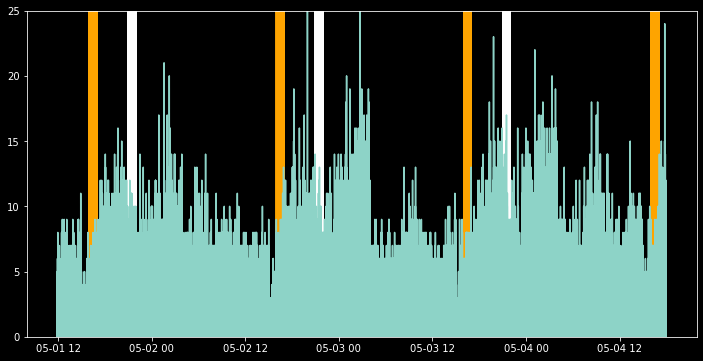

In [102]:
plt.figure(figsize = (12,6))
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'][:-1],np.diff(tudf['created_at'].apply(lambda x: x.second)) )
plt.ylim(0,25)

# location

In [85]:

tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'entities_tweet',
       'possibly_sensitive', 'source', 'public_metrics_tweet', 'text',
       'context_annotations', 'author_id', 'created_at', 'referenced_tweets',
       'in_reply_to_user_id', 'attachments', 'geo', 'withheld_tweet', 'name',
       'public_metrics_user', 'url', 'description', 'profile_image_url',
       'location', 'protected', 'username', 'verified', 'entities_user',
       'pinned_tweet_id', 'withheld_user', 'wordle_tweet_number',
       'wordle_tweet_rate', 'ones'],
      dtype='object')

In [87]:
tudf['geo'].value_counts()

0                                   189164
{'place_id': '206c436ce43a43a3'}        69
{'place_id': '018f1cde6bad9747'}        46
{'place_id': '3797791ff9c0e4c6'}        32
{'place_id': '0161be1b3f98d6c3'}        27
                                     ...  
{'place_id': '5524b796309058b5'}         1
{'place_id': '534d44fc60f378ec'}         1
{'place_id': '3b19e4995834dd32'}         1
{'place_id': '776bc3a7f14c1999'}         1
{'place_id': '966210afcb797b90'}         1
Name: geo, Length: 1293, dtype: int64